In [1]:
import MDAnalysis as mda
import MDAnalysis.transformations as trans
import nglview as nv
import numpy as np
import matplotlib.pyplot as plt

/opt/miniconda3/envs/mdenv/lib/python3.11/site-packages/Bio/Application/__init__.py:40: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [2]:
md_universe = mda.Universe("data/minimized.pdb","result/trajectory.dcd")

/opt/miniconda3/envs/mdenv/lib/python3.11/site-packages/MDAnalysis/topology/PDBParser.py:290: UserWarning: PDB file is missing resid information.  Defaulted to '1'
  warnings.warn("PDB file is missing resid information.  "
/opt/miniconda3/envs/mdenv/lib/python3.11/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [101]:
view = nv.show_mdanalysis(md_universe)
view.add_representation("point","resname HOH")
view

NGLWidget(max_frame=499)

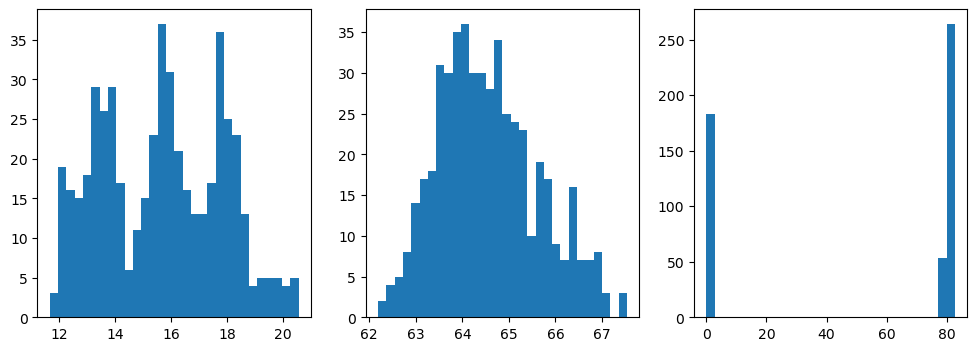

In [56]:
arr = []
for i in range(len(md_universe.trajectory)):
    md_universe.trajectory[i]
    arr.append(md_universe.select_atoms("resname ZN").center(None))
fig, axes = plt.subplots(1,3,figsize=(12,4))
for i, ax in enumerate(axes):
    ax.hist([v[i] for v in arr],bins=30)
plt.show()

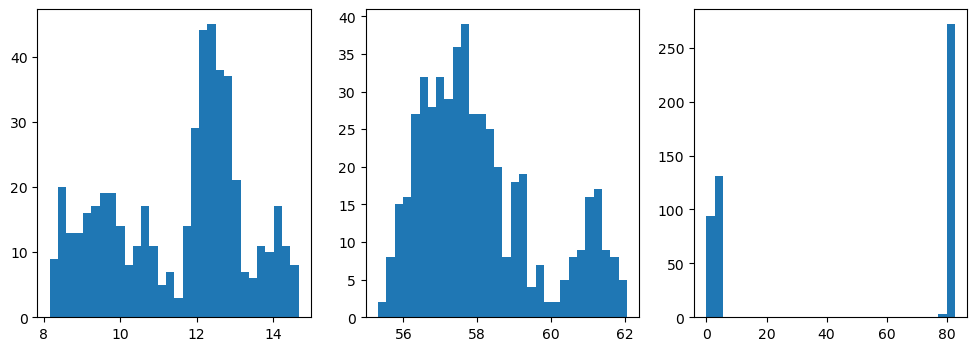

In [57]:
arr = []
for i in range(len(md_universe.trajectory)):
    md_universe.trajectory[i]
    arr.append(md_universe.select_atoms("protein").center(None))
fig, axes = plt.subplots(1,3,figsize=(12,4))
for i, ax in enumerate(axes):
    ax.hist([v[i] for v in arr],bins=30)
plt.show()

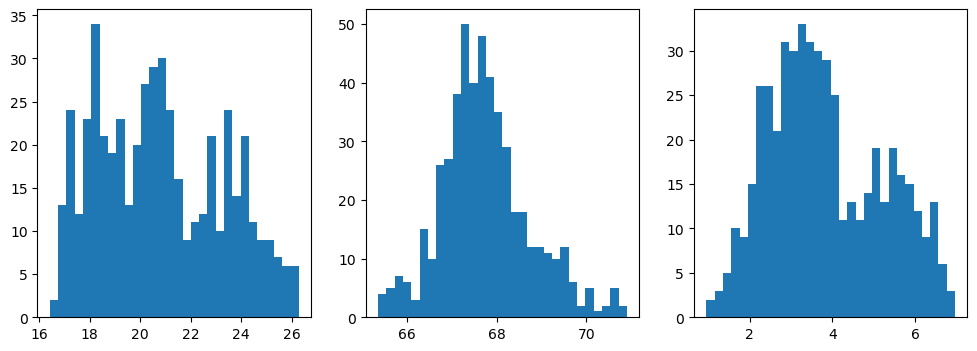

In [58]:
arr = []
for i in range(len(md_universe.trajectory)):
    md_universe.trajectory[i]
    arr.append(md_universe.select_atoms("resname UNK").center(None))
fig, axes = plt.subplots(1,3,figsize=(12,4))
for i, ax in enumerate(axes):
    ax.hist([v[i] for v in arr],bins=30)
plt.show()

/opt/miniconda3/envs/mdenv/lib/python3.11/site-packages/MDAnalysis/core/groups.py:445: DeprecationWarning: The 'pbc' kwarg has been deprecated and will be removed in version 3.0., please use 'wrap' instead
  warnings.warn("The 'pbc' kwarg has been deprecated and will be "


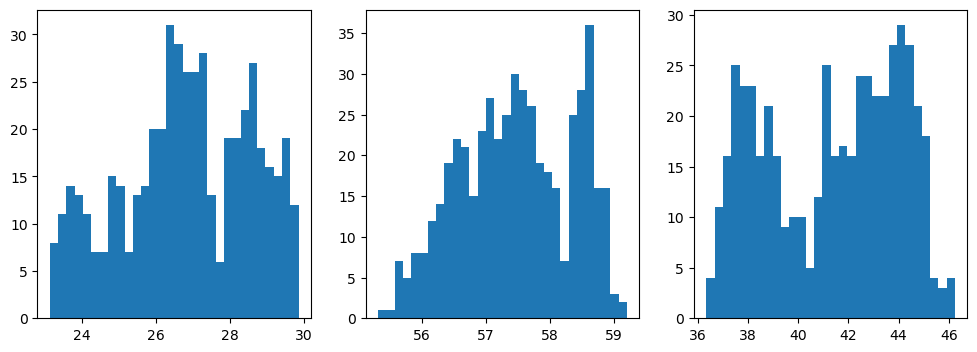

In [59]:
arr = []
for i in range(len(md_universe.trajectory)):
    md_universe.trajectory[i]
    arr.append(md_universe.select_atoms("protein").center(None,pbc=True))
fig, axes = plt.subplots(1,3,figsize=(12,4))
for i, ax in enumerate(axes):
    ax.hist([v[i] for v in arr],bins=30)
plt.show()

/opt/miniconda3/envs/mdenv/lib/python3.11/site-packages/MDAnalysis/core/groups.py:445: DeprecationWarning: The 'pbc' kwarg has been deprecated and will be removed in version 3.0., please use 'wrap' instead
  warnings.warn("The 'pbc' kwarg has been deprecated and will be "


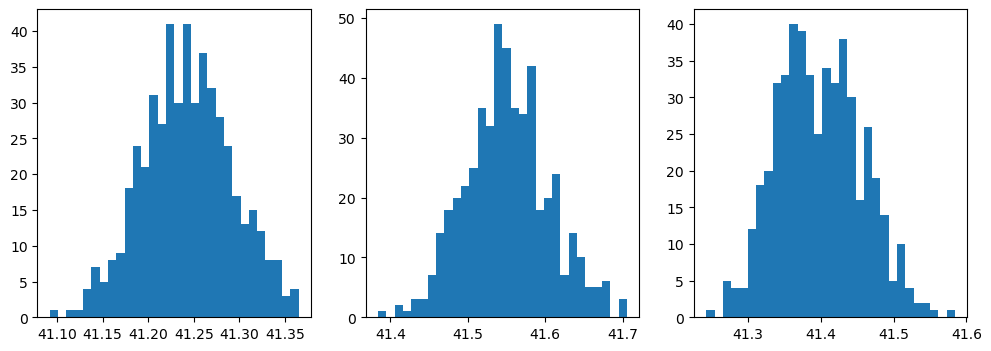

In [62]:
arr = []
for i in range(len(md_universe.trajectory)):
    md_universe.trajectory[i]
    arr.append(md_universe.atoms.center(None,pbc=True))
fig, axes = plt.subplots(1,3,figsize=(12,4))
for i, ax in enumerate(axes):
    ax.hist([v[i] for v in arr],bins=30)
plt.show()

In [3]:
protein = md_universe.select_atoms("protein")
ligand = md_universe.select_atoms("resname UNK")
zinc = md_universe.select_atoms("resname ZN")
transforms = [trans.center_in_box(protein), trans.wrap(ligand), trans.wrap(zinc)]
md_universe.trajectory.add_transformations(*transforms)

In [5]:
view = nv.show_mdanalysis(md_universe)
view.add_representation("point","resname UNK")
view.center()
view

NGLWidget(max_frame=499)